In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


# Modelisation and experimental context

We want to draw the random statics of multi-colocalization from RNA of N different populations with different abundancies (a1,a2...aN).

Let's try to modelize the spatial distributions of RNAs as an urn drawing problem.

**Context**

Let us consider *V* differently **numbered balls** in the urn. In our experiement a cell has *V* pixels we can resolve to find our RNAs, in other words V different positions. Each time a ball is drawn (e.g a position) it is **replaced** in the urn for the next RNA.

For each RNA we draw *aN* positions. Let's try to sequentially draw each positions.

## First distribution, N = 1

For the first distribution the probability to co-localize with any other distribion will obviously be 0. But we can have a look at the probability of self-colocalization.

At any draw the probability of have a chosen position is 1 out V positions :  *1/V* since positions are replaced in the urn.

Let us call k the iterations of drawing, the number of draws to perform is *a1*.

* At k=1, first drawing :

    The probability of self-colocalization is 0

* At k=2, :

    The probability of picking the position drawn in k=1 is **1/V** (ie self colocalization probality).
Or in other word the probablity of picking a new position is **1-1/V**.

* At k=3 : 

    Things complexify as the probability now depends on the outcome of k=2.
To adress this let us consider the probablity the position we drew was never drawn.
So this specific postion has 1/V chance to be drawn at first draw and then again 1/V, we can view this a binomial trial without any sucess
so this probability is (1/V)².

* At k>2 :

     the probability that at draw k the picked position was never drawn is a binomial trial without any sucess : **(1/V)^k**.
Meaning that the probality that the position drawn was already drawn is **1 - (1/V)^k** which is, in other words, **the self-colocalization probablity**.

What is the expected number of redudant draws at k ?

At each draw, the probabilty of drawing a new position is **p = (1/V)^k** we can expect to draw k*p (expectancy of binomial distribution) different positions for k drawing.


In [85]:
V = 100
a1 = 100
experiment_number = 100000

In [86]:
random_generator = np.random.default_rng()
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws

array([[ 67,  98,  23, ...,  98,  14,   5],
       [ 38,  13,  16, ...,  61, 100,  36],
       [ 87,  87,  79, ...,  31,  70,  75],
       ...,
       [ 54,  92,  57, ...,  40,  10,  48],
       [ 42,  68,   7, ...,  15,  58,  17],
       [ 25,  24,  91, ...,  63,  91,  55]])

In [87]:
colocalisation_count = []
for experiment in draws :
    colocalisation_count.append(len(experiment) - len(np.unique(experiment)))

expected_number_colocalisation :  36.603234127322914


(0.0, 100.0, 0.0, 0.13815173076923093)

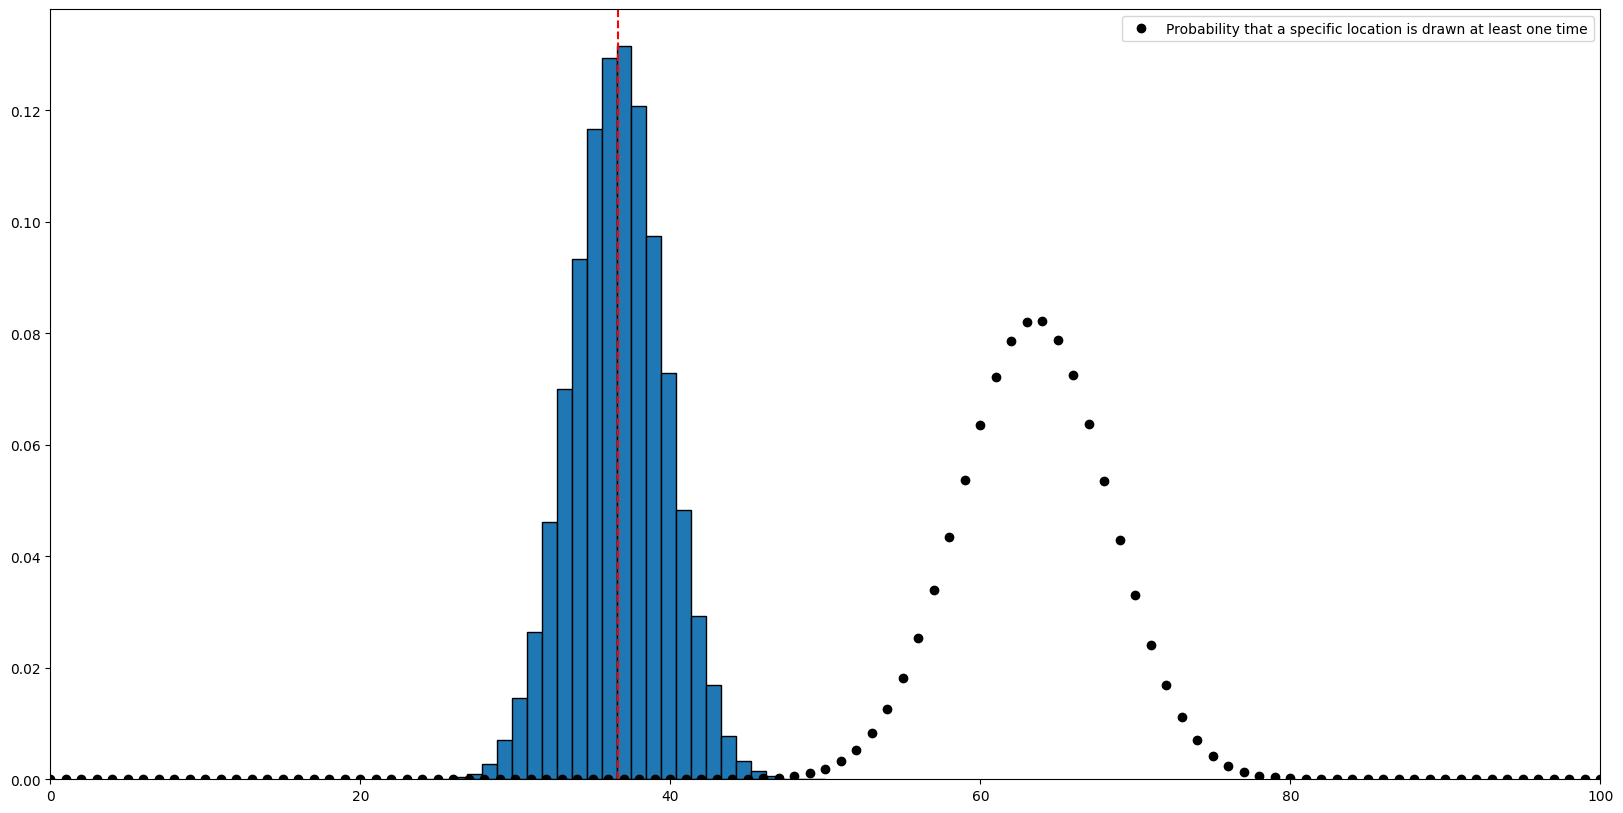

In [89]:
p = 1-(1-1/V)**a1 #

x = np.arange(a1 +1 )
pmf = binom.pmf(x,a1, p)

expceted_number_colocalisation = V- V*p

print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True)

ax.set_xlim(0,a1)
ax.plot(x, pmf, 'ok', label= "Probability that a specific location is drawn at least one time")
xmin,xmax,ymin,ymax = plt.axis()
ax.plot([expceted_number_colocalisation,expceted_number_colocalisation],[ymin,ymax], '--r')
ax.legend()

plt.axis([xmin,xmax,ymin,ymax])



